In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('doanh_thu_du_lich.csv')
df.head()

,Tỉnh/Thành phố,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Sơ bộ 2023
0,CẢ NƯỚC,"15.539,30","18.852,90","24.820,60","27.799,40","30.444,10","32.530,30","36.111,80","40.371,20","44.669,90","16.492,00","8.998,84","43.505,51","68.966,60"
1,Đồng bằng sông Hồng,"4.226,00","3.479,20","7.347,10","8.140,80","8.543,00","9.071,80","9.583,60","10.507,40","11.556,10","6.128,30","3.938,06","16.873,93","24.533,93"
2,Hà Nội,"4.005,60","3.006,60","6.764,00","7.482,80","7.831,90","8.065,30","8.465,80","9.273,70","10.145,50","5.184,40","3.382,00","14.773,82","20.753,47"
3,Vĩnh Phúc,"6,60","10,60","40,60","68,00","71,50","78,40","83,70","86,70","96,30","73,90","44,70","110,04","258,89"
4,Bắc Ninh,"2,20","3,00","4,90","5,40","12,30","17,80","20,00","23,00","25,00","10,90","2,04","48,78","110,80"


In [4]:
clean_df = df.drop(columns=['2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
clean_df

,Tỉnh/Thành phố,2019,2020,2021,2022,Sơ bộ 2023
0,CẢ NƯỚC,"44.669,90","16.492,00","8.998,84","43.505,51","68.966,60"
1,Đồng bằng sông Hồng,"11.556,10","6.128,30","3.938,06","16.873,93","24.533,93"
2,Hà Nội,"10.145,50","5.184,40","3.382,00","14.773,82","20.753,47"
3,Vĩnh Phúc,"96,30","73,90","44,70","110,04","258,89"
4,Bắc Ninh,"25,00","10,90","2,04","48,78","110,80"
...,...,...,...,...,...,...
65,Cần Thơ,"214,20","64,30","35,90","331,88","397,92"
66,Hậu Giang,..,..,..,"0,54",..
67,Sóc Trăng,"11,40","7,80","3,68","21,91","62,46"
68,Bạc Liêu,"5,00","4,40","2,33","13,43","38,31"


In [5]:
clean_df.rename(columns={'Sơ bộ 2023': '2023'}, inplace=True)

clean_df.replace('..', np.nan, inplace=True)

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tỉnh/Thành phố  70 non-null     object
 1   2019            68 non-null     object
 2   2020            69 non-null     object
 3   2021            68 non-null     object
 4   2022            69 non-null     object
 5   2023            68 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [7]:
#Hàm chuyển đổi về float
def convert_to_float(val):
    if isinstance(val, str):
        return float(val.replace('.', '').replace(',', '.'))
    return val
for col in clean_df.columns[1:]:
    clean_df[col] = clean_df[col].apply(convert_to_float)

In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tỉnh/Thành phố  70 non-null     object 
 1   2019            68 non-null     float64
 2   2020            69 non-null     float64
 3   2021            68 non-null     float64
 4   2022            69 non-null     float64
 5   2023            68 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.4+ KB


In [16]:
nan_count = clean_df.isnull().sum()
nan_count

Tỉnh/Thành phố    0
2019              2
2020              1
2021              2
2022              1
2023              2
dtype: int64

In [18]:
#Điền dữ liệu thiếu bằng nội suy(Interpolate)
#Bỏ qua cột Tỉnh/Thành phố chỉ nội quy từ cột 2019-2023 
clean_df.iloc[:, 1:] = clean_df.iloc[:, 1:].interpolate(method='linear', inplace=False) # False: theo cột 

In [20]:
print(clean_df.isnull().sum())

Tỉnh/Thành phố    0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64


In [68]:
# chọn lọc vùng 
vung = [
    'Đồng bằng sông Hồng',
    'Trung du và miền núi phía Bắc',
    'Bắc Trung Bộ và Duyên hải miền Trung',
    'Đông Nam Bộ',
    'Đồng bằng sông Cửu Long'
]
data_new = clean_df[clean_df['Tỉnh/Thành phố'].isin(vung)]
data_new

,Tỉnh/Thành phố,2019,2020,2021,2022,2023
1,Đồng bằng sông Hồng,11556.1,6128.3,3938.06,16873.93,24533.93
13,Trung du và miền núi phía Bắc,387.7,211.2,132.90,545.41,979.03
28,Bắc Trung Bộ và Duyên hải miền Trung,4111.5,1367.3,1060.87,4976.36,9564.09
49,Đông Nam Bộ,27468.7,8264.8,3501.92,19060.62,30249.89
56,Đồng bằng sông Cửu Long,1000.8,457.7,314.09,1891.56,3409.17


In [70]:
print(data_new.columns)

Index(['Tỉnh/Thành phố', '2019', '2020', '2021', '2022', '2023'], dtype='object')


In [74]:
# Đặt chỉ số là Tỉnh/Thành phố
data_new.set_index('Tỉnh/Thành phố', inplace=True)

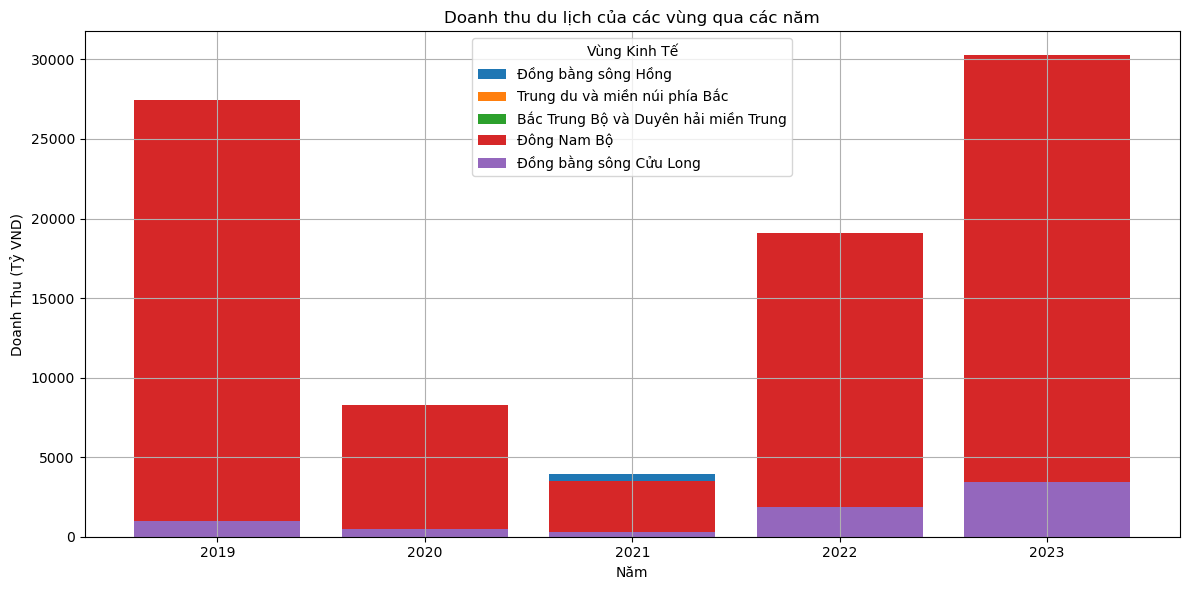

In [86]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
for i in data_new.index:
    plt.bar(data_new.columns, data_new.loc[i], label=i)

plt.title('Doanh thu du lịch của các vùng qua các năm')
plt.xlabel('Năm')
plt.ylabel('Doanh Thu (Tỷ VND)')
plt.legend(title='Vùng Kinh Tế')
plt.grid(True)
plt.tight_layout()
plt.show()

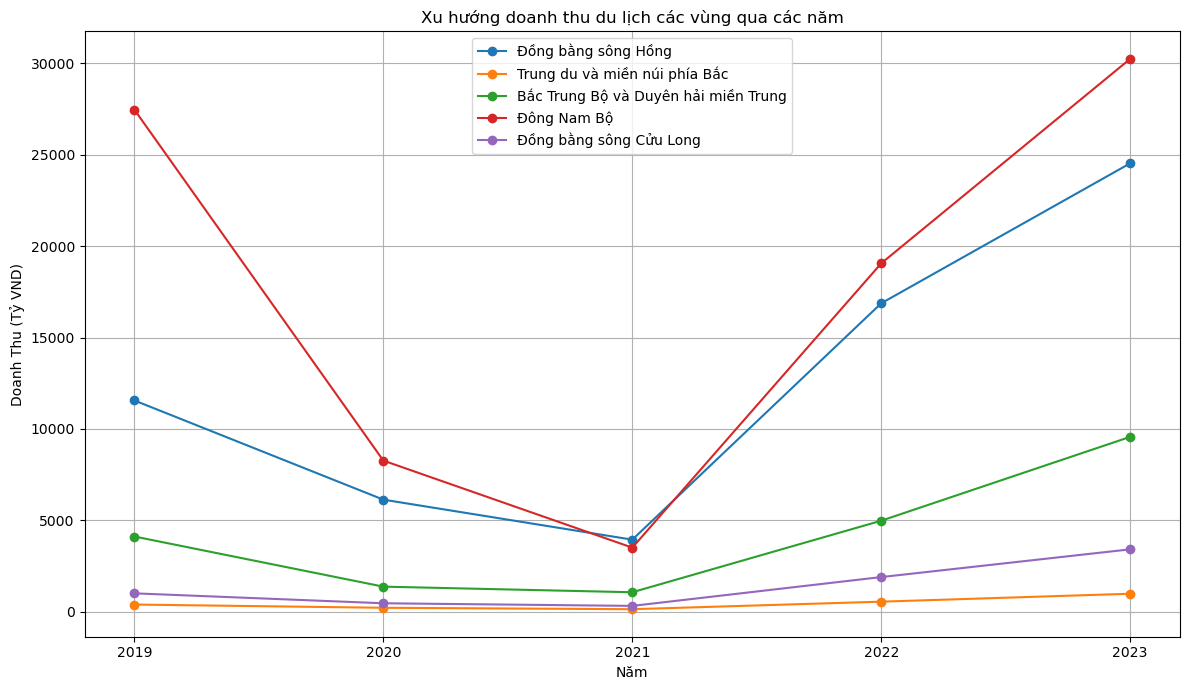

In [90]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 7))
for i in data_new.index:
    plt.plot(data_new.columns, data_new.loc[i], marker='o', label=i)

plt.title('Xu hướng doanh thu du lịch các vùng qua các năm')
plt.xlabel('Năm')
plt.ylabel('Doanh Thu (Tỷ VND)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

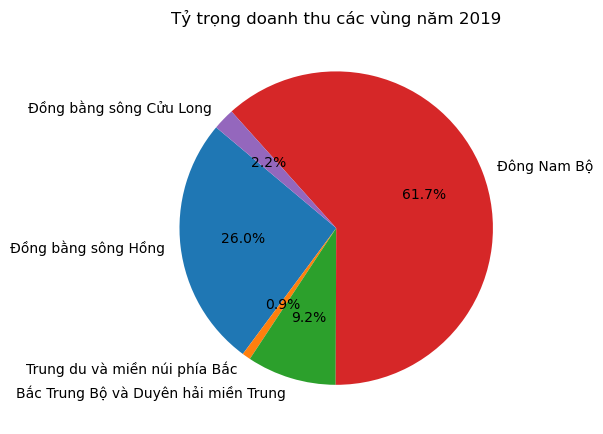

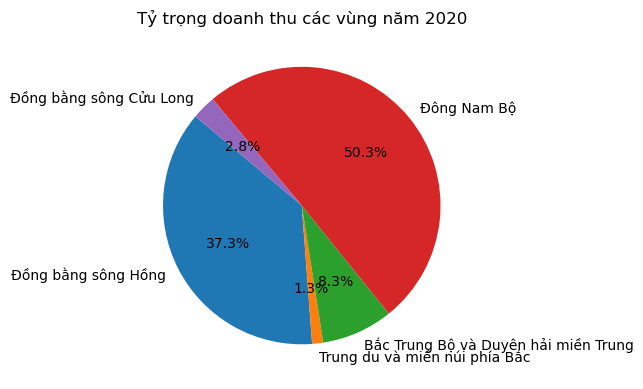

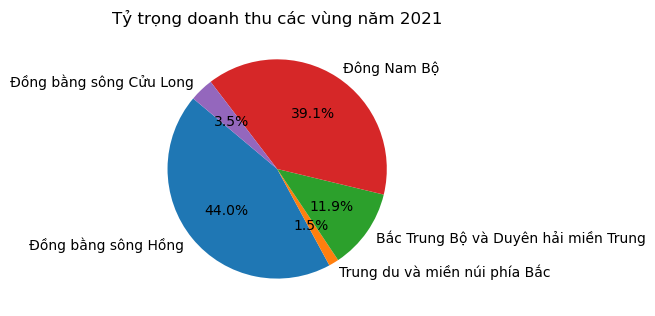

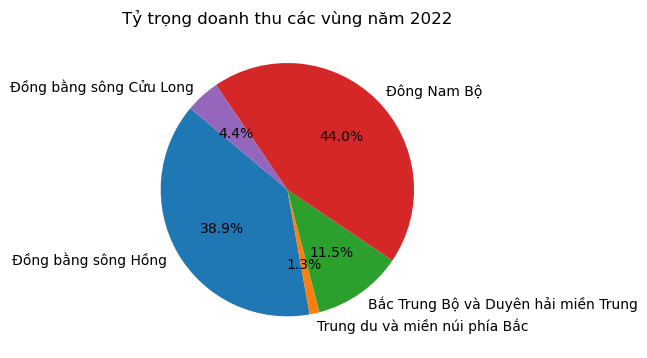

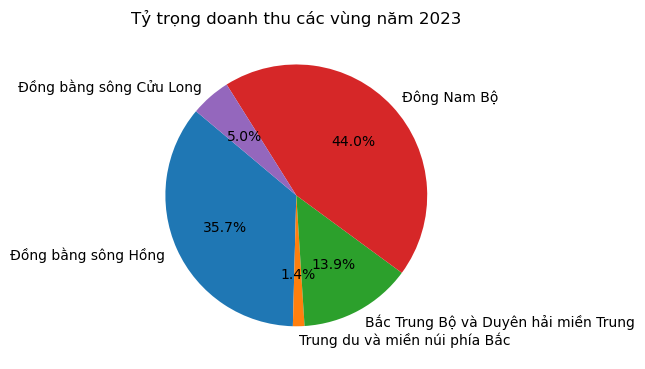

In [122]:
# Vẽ biểu đồ tròn thể hiện tỷ trọng doanh thu của các vùng qua các năm
for year in data_new.columns:
    plt.figure(figsize=(6, 6))
    plt.pie(data_new[year], labels=data_new.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Tỷ trọng doanh thu các vùng năm {year}')
    plt.tight_layout()
    plt.show()